In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('../input/train.csv', index_col='reservation_id', parse_dates=True)
test = pd.read_csv('../input/test.csv', index_col='reservation_id', parse_dates=True)

In [3]:
print (train.shape)
print (test.shape)

(341424, 23)
(146765, 22)


In [4]:
print (train.isnull().sum()*100/train.shape[0])
print (test.isnull().sum()*100/test.shape[0])

booking_date                          0.000000
checkin_date                          0.000000
checkout_date                         0.000000
channel_code                          0.000000
main_product_code                     0.000000
numberofadults                        0.000000
numberofchildren                      0.000000
persontravellingid                    0.000000
resort_region_code                    0.000000
resort_type_code                      0.000000
room_type_booked_code                 0.000000
roomnights                            0.000000
season_holidayed_code                 0.033390
state_code_residence                  1.395332
state_code_resort                     0.000000
total_pax                             0.000000
member_age_buckets                    0.000000
booking_type_code                     0.000000
memberid                              0.000000
cluster_code                          0.000000
reservationstatusid_code              0.000000
resort_id    

In [5]:
def convert_year(x):
    temp = x.split('/')
    temp[2] = '20'+temp[2]
    return '-'.join(temp)

train['checkin_date'] = train['checkin_date'].astype('str').apply(lambda x: convert_year(x))
train['checkout_date'] = train['checkout_date'].astype('str').apply(lambda x: convert_year(x))
train['booking_date'] = train['booking_date'].astype('str').apply(lambda x: convert_year(x))

test['checkin_date'] = test['checkin_date'].astype('str').apply(lambda x: convert_year(x))
test['checkout_date'] = test['checkout_date'].astype('str').apply(lambda x: convert_year(x))
test['booking_date'] = test['booking_date'].astype('str').apply(lambda x: convert_year(x))

train['checkin_date'] = pd.to_datetime(train['checkin_date'])
train['checkout_date'] = pd.to_datetime(train['checkout_date'])
train['booking_date'] = pd.to_datetime(train['booking_date'])

test['checkin_date'] = pd.to_datetime(test['checkin_date'])
test['checkout_date'] = pd.to_datetime(test['checkout_date'])
test['booking_date'] = pd.to_datetime(test['booking_date'])

In [6]:
train['chkout_chkin_diff'] = (train['checkout_date']-train['checkin_date']).dt.days
train['chkin_book_diff'] = (train['checkin_date']-train['booking_date']).dt.days

test['chkout_chkin_diff'] = (test['checkout_date']-test['checkin_date']).dt.days
test['chkin_book_diff'] = (test['checkin_date']-test['booking_date']).dt.days


In [7]:
import datetime
import pandas as pd
from pandas_datareader import data
import re

def add_datepart(df, fldname, drop=True):
    fld = df[fldname]
    if not np.issubdtype(fld.dtype, np.datetime64):
        df[fldname] = fld = pd.to_datetime(fld, infer_datetime_format=True)
    targ_pre = re.sub('[Dd]ate$', '', fldname)
    for n in ('Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
            'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start'):
        df[targ_pre+n] = getattr(fld.dt,n.lower())
    df[targ_pre+'Elapsed'] = fld.astype(np.int64) // 10**9
    if drop: df.drop(fldname, axis=1, inplace=True)


In [8]:
add_datepart(train, 'booking_date')
add_datepart(test, 'booking_date')
add_datepart(train, 'checkin_date')
add_datepart(test, 'checkin_date')
add_datepart(train, 'checkout_date')
add_datepart(test, 'checkout_date')

In [9]:
train['total_people'] = train['numberofadults'] + train['numberofchildren']
test['total_people'] = test['numberofadults'] + test['numberofchildren']

train['not_travelling'] = train['total_people'] - train['total_pax']
test['not_travelling'] = test['total_people'] - test['total_pax']

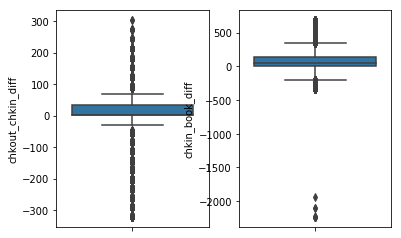

In [10]:
fig, axs = plt.subplots(ncols=2)
sns.boxplot(x=train['chkout_chkin_diff'], orient='v', ax=axs[0])
sns.boxplot(x=train['chkin_book_diff'], orient='v', ax=axs[1])

In [11]:
train.loc[train.chkout_chkin_diff < 0, 'chkout_chkin_diff'] = 0
train.loc[train.chkin_book_diff < 0, 'chkin_book_diff'] = 0
test.loc[test.chkout_chkin_diff < 0, 'chkout_chkin_diff'] = 0
test.loc[test.chkin_book_diff < 0, 'chkin_book_diff'] = 0

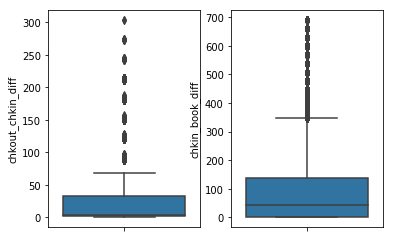

In [12]:
fig, axs = plt.subplots(ncols=2)
sns.boxplot(x=train['chkout_chkin_diff'], orient='v', ax=axs[0])
sns.boxplot(x=train['chkin_book_diff'], orient='v', ax=axs[1])

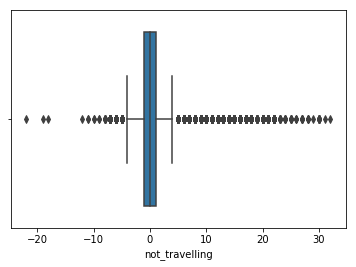

In [13]:
sns.boxplot(x='not_travelling', data=train)

In [14]:
train.loc[train.not_travelling < 0, 'not_travelling'] = 0
train.loc[train.not_travelling < 0, 'not_travelling'] = 0
test.loc[test.not_travelling < 0, 'not_travelling'] = 0
test.loc[test.not_travelling < 0, 'not_travelling'] = 0

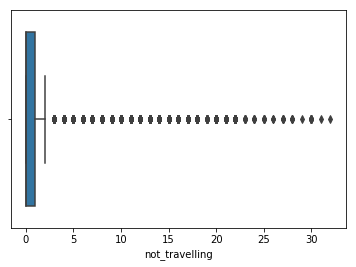

In [15]:
sns.boxplot(x='not_travelling', data=train)

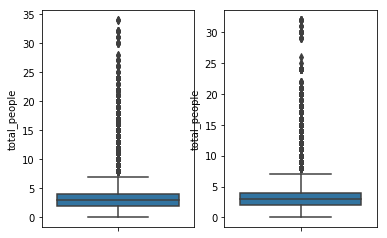

In [16]:
fig, axs = plt.subplots(ncols=2)
sns.boxplot(x=train['total_people'], orient='v', ax=axs[0])
sns.boxplot(x=test['total_people'], orient='v', ax=axs[1])

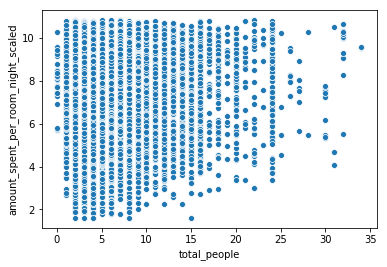

In [17]:
sns.scatterplot(x='total_people', y='amount_spent_per_room_night_scaled', data=train)

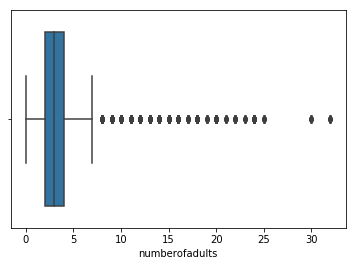

In [18]:
sns.boxplot(x='numberofadults', orient='h',data=train)

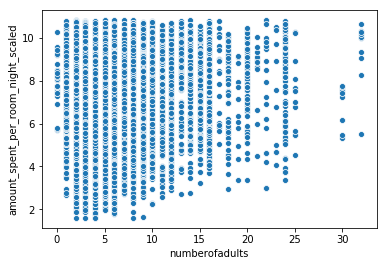

In [19]:
sns.scatterplot(x='numberofadults', y='amount_spent_per_room_night_scaled', data=train)

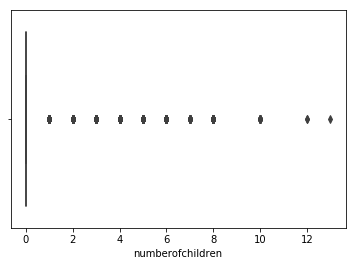

In [20]:
sns.boxplot(x='numberofchildren', orient='h',data=train)

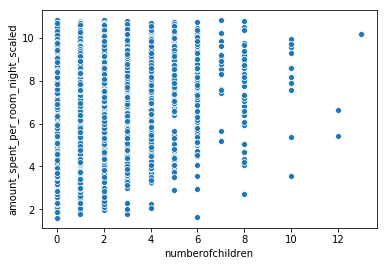

In [21]:
sns.scatterplot(x='numberofchildren', y='amount_spent_per_room_night_scaled', data=train)

In [22]:
cat_vars = ['channel_code','main_product_code','resort_region_code','resort_type_code','room_type_booked_code','season_holidayed_code','state_code_residence','state_code_resort','member_age_buckets','booking_type_code','cluster_code','reservationstatusid_code',
            'resort_id', 'persontravellingid']
for col in cat_vars:
    print ('Processing ', col)
    print ('Train uniques', train[col].unique().shape)
    print ('Test uniques', test[col].unique().shape)
    train[col] = train[col].astype('str')
    test[col] = test[col].astype('str')
    
from sklearn.preprocessing import LabelEncoder
encoder = {}
for col in cat_vars:
    print ('Processing ', col)
    le = LabelEncoder()
    le.fit(train[col])
    train[col] = le.transform(train[col])
    for attr in test[col].unique().tolist():
        if attr not in le.classes_:
            le.classes_ = np.append(le.classes_, values=attr)
    encoder[col] = le
    test[col] = le.transform(test[col])
    
coe_train = train['checkout_Elapsed'][0]
cie_train = train['checkin_Elapsed'][0]
boe_train = train['booking_Elapsed'][0]
train['checkout_Elapsed'] = train['checkout_Elapsed'] / coe_train
test['checkout_Elapsed'] = test['checkout_Elapsed'] / coe_train
train['checkin_Elapsed'] = train['checkin_Elapsed'] / cie_train
test['checkin_Elapsed'] = test['checkin_Elapsed'] / cie_train
train['booking_Elapsed'] = train['booking_Elapsed'] / boe_train
test['booking_Elapsed'] = test['booking_Elapsed'] / boe_train

Processing  channel_code
Train uniques (3,)
Test uniques (3,)
Processing  main_product_code
Train uniques (5,)
Test uniques (5,)
Processing  resort_region_code
Train uniques (3,)
Test uniques (3,)
Processing  resort_type_code
Train uniques (7,)
Test uniques (7,)
Processing  room_type_booked_code
Train uniques (6,)
Test uniques (6,)
Processing  season_holidayed_code
Train uniques (5,)
Test uniques (5,)
Processing  state_code_residence
Train uniques (38,)
Test uniques (38,)
Processing  state_code_resort
Train uniques (11,)
Test uniques (11,)
Processing  member_age_buckets
Train uniques (10,)
Test uniques (10,)
Processing  booking_type_code
Train uniques (2,)
Test uniques (2,)
Processing  cluster_code
Train uniques (6,)
Test uniques (6,)
Processing  reservationstatusid_code
Train uniques (4,)
Test uniques (3,)
Processing  resort_id
Train uniques (32,)
Test uniques (32,)
Processing  persontravellingid
Train uniques (6,)
Test uniques (6,)
Processing  channel_code
Processing  main_product_co

In [23]:
train_params = ['channel_code',
'main_product_code', 
'numberofadults', 
'numberofchildren', 
'persontravellingid', 
'resort_region_code', 
'resort_type_code', 
'room_type_booked_code', 
'roomnights', 
'season_holidayed_code', 
'state_code_residence', 
'state_code_resort', 
'total_pax', 
'member_age_buckets', 
'booking_type_code', 
'cluster_code', 
'reservationstatusid_code', 
'resort_id', 
'booking_Year', 
'booking_Month', 
'booking_Week', 
'booking_Day', 
'booking_Dayofweek', 
'booking_Dayofyear', 
'booking_Is_month_end', 
'booking_Is_month_start', 
'booking_Is_quarter_end', 
'booking_Is_quarter_start', 
'booking_Is_year_end', 
'booking_Is_year_start', 
'booking_Elapsed', 
'checkin_Year', 
'checkin_Month', 
'checkin_Week', 
'checkin_Day', 
'checkin_Dayofweek', 
'checkin_Dayofyear', 
'checkin_Is_month_end', 
'checkin_Is_month_start', 
'checkin_Is_quarter_end', 
'checkin_Is_quarter_start', 
'checkin_Is_year_end', 
'checkin_Is_year_start', 
'checkin_Elapsed', 
'checkout_Year', 
'checkout_Month', 
'checkout_Week', 
'checkout_Day', 
'checkout_Dayofweek', 
'checkout_Dayofyear', 
'checkout_Is_month_end', 
'checkout_Is_month_start', 
'checkout_Is_quarter_end', 
'checkout_Is_quarter_start', 
'checkout_Is_year_end', 
'checkout_Is_year_start', 
'checkout_Elapsed', 
'total_people',
'not_travelling',
'chkout_chkin_diff',
'chkin_book_diff']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train[train_params], train['amount_spent_per_room_night_scaled'], test_size = 0.20, random_state = 0)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = 0)

In [24]:
import lightgbm as lgb

print('Training and making predictions')
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'rmse',
    'max_depth': 6, 
    'learning_rate': 0.05,
    'verbose': 1, 
    'early_stopping_round': 2}
n_estimators = 1000

dtrain = lgb.Dataset(X_train, label=y_train)
dvalid = lgb.Dataset(X_val, label=y_val)

Training and making predictions


In [25]:
watchlist = [dvalid]
model_1 = lgb.train(params, dtrain, n_estimators, watchlist, verbose_eval=1)

/opt/conda/lib/python3.6/site-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's rmse: 1.09055
Training until validation scores don't improve for 2 rounds.
[2]	valid_0's rmse: 1.08626
[3]	valid_0's rmse: 1.08241
[4]	valid_0's rmse: 1.07901
[5]	valid_0's rmse: 1.07611
[6]	valid_0's rmse: 1.07346
[7]	valid_0's rmse: 1.071
[8]	valid_0's rmse: 1.06811
[9]	valid_0's rmse: 1.0655
[10]	valid_0's rmse: 1.06332
[11]	valid_0's rmse: 1.06088
[12]	valid_0's rmse: 1.05881
[13]	valid_0's rmse: 1.05698
[14]	valid_0's rmse: 1.0553
[15]	valid_0's rmse: 1.05388
[16]	valid_0's rmse: 1.05231
[17]	valid_0's rmse: 1.05054
[18]	valid_0's rmse: 1.04878
[19]	valid_0's rmse: 1.04735
[20]	valid_0's rmse: 1.04605
[21]	valid_0's rmse: 1.04447
[22]	valid_0's rmse: 1.04302
[23]	valid_0's rmse: 1.04171
[24]	valid_0's rmse: 1.04051
[25]	valid_0's rmse: 1.0393
[26]	valid_0's rmse: 1.0381
[27]	valid_0's rmse: 1.03679
[28]	valid_0's rmse: 1.03548
[29]	valid_0's rmse: 1.03464
[30]	valid_0's rmse: 1.03368
[31]	valid_0's rmse: 1.03225
[32]	valid_0's rmse: 1.03132
[33]	valid_0's rmse: 1.029

In [26]:
test_model(model_1)

NameError: name 'test_model' is not defined

In [27]:
X_train, X_test, y_train, y_test = train_test_split(train[train_params], train['amount_spent_per_room_night_scaled'], test_size = 0.2, random_state = 9)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = 9)

dtrain = lgb.Dataset(X_train, label=y_train, free_raw_data=False)
dvalid = lgb.Dataset(X_val, label=y_val,free_raw_data=False)

watchlist = [dvalid]

model_2 = lgb.train(params, dtrain, n_estimators, watchlist, verbose_eval=1)
test_model(model_2)

/opt/conda/lib/python3.6/site-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's rmse: 1.07644
Training until validation scores don't improve for 2 rounds.
[2]	valid_0's rmse: 1.07218
[3]	valid_0's rmse: 1.06869
[4]	valid_0's rmse: 1.06535
[5]	valid_0's rmse: 1.06197
[6]	valid_0's rmse: 1.05914
[7]	valid_0's rmse: 1.05666
[8]	valid_0's rmse: 1.0543
[9]	valid_0's rmse: 1.05175
[10]	valid_0's rmse: 1.04938
[11]	valid_0's rmse: 1.04729
[12]	valid_0's rmse: 1.04498
[13]	valid_0's rmse: 1.04285
[14]	valid_0's rmse: 1.04112
[15]	valid_0's rmse: 1.03924
[16]	valid_0's rmse: 1.03757
[17]	valid_0's rmse: 1.0361
[18]	valid_0's rmse: 1.03472
[19]	valid_0's rmse: 1.03348
[20]	valid_0's rmse: 1.03199
[21]	valid_0's rmse: 1.03039
[22]	valid_0's rmse: 1.02919
[23]	valid_0's rmse: 1.02795
[24]	valid_0's rmse: 1.02643
[25]	valid_0's rmse: 1.02526
[26]	valid_0's rmse: 1.02367
[27]	valid_0's rmse: 1.02228
[28]	valid_0's rmse: 1.02112
[29]	valid_0's rmse: 1.01999
[30]	valid_0's rmse: 1.01895
[31]	valid_0's rmse: 1.01791
[32]	valid_0's rmse: 1.01716
[33]	valid_0's rmse: 1

NameError: name 'test_model' is not defined

In [28]:
X_train, X_test, y_train, y_test = train_test_split(train[train_params], train['amount_spent_per_room_night_scaled'], test_size = 0.2, random_state = 89)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = 18)

dtrain = lgb.Dataset(X_train, label=y_train, free_raw_data=False)
dvalid = lgb.Dataset(X_val, label=y_val, free_raw_data=False)

watchlist = [dvalid]

model_3 = lgb.train(params, dtrain, n_estimators, watchlist, verbose_eval=1)
test_model(model_2)

/opt/conda/lib/python3.6/site-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's rmse: 1.08681
Training until validation scores don't improve for 2 rounds.
[2]	valid_0's rmse: 1.0824
[3]	valid_0's rmse: 1.0788
[4]	valid_0's rmse: 1.0754
[5]	valid_0's rmse: 1.07224
[6]	valid_0's rmse: 1.06925
[7]	valid_0's rmse: 1.06605
[8]	valid_0's rmse: 1.0636
[9]	valid_0's rmse: 1.06114
[10]	valid_0's rmse: 1.05869
[11]	valid_0's rmse: 1.05627
[12]	valid_0's rmse: 1.05407
[13]	valid_0's rmse: 1.05212
[14]	valid_0's rmse: 1.05043
[15]	valid_0's rmse: 1.04851
[16]	valid_0's rmse: 1.04665
[17]	valid_0's rmse: 1.04497
[18]	valid_0's rmse: 1.04319
[19]	valid_0's rmse: 1.04153
[20]	valid_0's rmse: 1.04016
[21]	valid_0's rmse: 1.03882
[22]	valid_0's rmse: 1.03737
[23]	valid_0's rmse: 1.0361
[24]	valid_0's rmse: 1.03482
[25]	valid_0's rmse: 1.03364
[26]	valid_0's rmse: 1.03203
[27]	valid_0's rmse: 1.03072
[28]	valid_0's rmse: 1.0297
[29]	valid_0's rmse: 1.02877
[30]	valid_0's rmse: 1.02711
[31]	valid_0's rmse: 1.02627
[32]	valid_0's rmse: 1.02531
[33]	valid_0's rmse: 1.024

NameError: name 'test_model' is not defined

In [29]:
X_train, X_test, y_train, y_test = train_test_split(train[train_params], train['amount_spent_per_room_night_scaled'], test_size = 0.2, random_state = 9)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.8, random_state = 9)

In [30]:
y_m1_test = model_1.predict(X_test)
y_m2_test = model_2.predict(X_test)
y_m3_test = model_3.predict(X_test)

In [31]:
def test_modl(model, X, y):
    y_pred5 = model.predict(X)
    print('Test r2 score: ', r2_score(y, y_pred5))
    test_mse5 = mean_squared_error(y_pred5, y)
    test_rmse5 = np.sqrt(test_mse5)
    print('Test RMSE: %.4f' % test_rmse5)

In [32]:
print(test_modl(model_1, X_val, y_val))
print(test_modl(model_2, X_val, y_val))
print(test_modl(model_3, X_val, y_val))

Test r2 score:  0.1938686498479083
Test RMSE: 0.9665
None
Test r2 score:  0.17487935494899043
Test RMSE: 0.9778
None
Test r2 score:  0.18786749243629353
Test RMSE: 0.9700
None


In [33]:
y1 = model_1.predict(test[train_params])
y2 = model_2.predict(test[train_params])
y3 = model_3.predict(test[train_params])

In [34]:
final = (y1 + y2 + y3)/3

In [35]:
sub = pd.read_csv('../input/sample_submission.csv')
sub['amount_spent_per_room_night_scaled'] = final
sub.to_csv('sub4.csv', index=False)

In [36]:
final

array([8.18016338, 7.40444734, 7.59736099, ..., 8.39937203, 7.95638813,
       7.32403265])

In [37]:
def test_model(model):
    y_train_pred5 = model.predict(X_train)
    y_pred5 = model.predict(X_test)

    print('Train r2 score: ', r2_score(y_train_pred5, y_train))
    print('Test r2 score: ', r2_score(y_test, y_pred5))
    train_mse5 = mean_squared_error(y_train_pred5, y_train)
    test_mse5 = mean_squared_error(y_pred5, y_test)
    train_rmse5 = np.sqrt(train_mse5)
    test_rmse5 = np.sqrt(test_mse5)
    print('Train RMSE: %.4f' % train_rmse5)
    print('Test RMSE: %.4f' % test_rmse5)

In [38]:
#test_model(model)

In [39]:
def submit(model):
    sub = pd.read_csv('../input/sample_submission.csv')
    sub['amount_spent_per_room_night_scaled'] = model.predict(test[train_params])
    sub.to_csv('sub3.csv', index=False)

In [40]:
#submit(model)